In [1]:
import pandas as pd
from plotnine import *
import numpy as np
import multiprocessing
from adjustText import adjust_text

# Figure 4: Archaelogical samples

## Fig 4A: Dog vs Human endogenous DNA source classification

In [2]:
endo_human = 1.247484
endo_dog = 0.106391

In [3]:
bp_non_udg = "../../data/coproid_logratio/coproID_bp_non_udg.csv"
bp_udg_half = "../../data/coproid_logratio/coproID_bp_udg_half.csv"

In [4]:
d_non_udg = pd.read_csv(bp_non_udg, index_col=0)
d_udg_half = pd.read_csv(bp_udg_half, index_col=0)

In [5]:
d = d_non_udg.append(d_udg_half)

In [6]:
d

,Organism_name1,Organism_name2,Genome1_size,Genome2_size,nb_bp_aligned_genome1,nb_bp_aligned_genome2,nb_ancient_bp_aligned_genome1,nb_ancient_bp_aligned_genome2,normalized_nb_ancient_bp_aligned_genome1,normalized_nb_ancient_bp_aligned_genome2,NormalizedReadRatio_1,NormalizedReadRatio_2
Sample_name,,,,,,,,,,,,
ZSM002,Homo_sapiens,Canis_familiaris,3099922541,2327650711,57333,44158616,36871,1295863,1.189449e-04,0.055673,0.002132,0.997868
ZSM005,Homo_sapiens,Canis_familiaris,3099922541,2327650711,7949078,35501,650158,7270,2.097340e-03,0.000312,0.870368,0.129632
ZSM023,Homo_sapiens,Canis_familiaris,3099922541,2327650711,41783,2887174,1512,62032,4.880767e-06,0.002665,0.001828,0.998172
ZSM025,Homo_sapiens,Canis_familiaris,3099922541,2327650711,42619838,8149,717175,30425,2.313529e-03,0.001307,0.638976,0.361024
ZSM027,Homo_sapiens,Canis_familiaris,3099922541,2327650711,9465714,6575,127210,8147,4.103683e-04,0.000350,0.539659,0.460341
ZSM028,Homo_sapiens,Canis_familiaris,3099922541,2327650711,3979322,300276,285360,17971,9.205424e-04,0.000772,0.543846,0.456154
ZSM029,Homo_sapiens,Canis_familiaris,3099922541,2327650711,167732,13897565,18471,387446,5.958859e-05,0.016645,0.003567,0.996433
ZSM031,Homo_sapiens,Canis_familiaris,3099922541,2327650711,26400287,51214,348341,18476,1.123712e-03,0.000794,0.586025,0.413975
AHP001,Homo_sapiens,Canis_familiaris,3099922541,2327650711,83126,820433,2173,92277,7.013078e-06,0.003964,0.001766,0.998234


In [7]:
d2 = pd.DataFrame()

In [8]:
d2['nnb_bp_aligned_genome1'] = (d['nb_bp_aligned_genome1']/d['Genome1_size'][0])/endo_human
d2['nnb_ancient_bp_aligned_genome1'] = (d['nb_ancient_bp_aligned_genome1']/d['Genome1_size'][0])/endo_human
d2['nnb_bp_aligned_genome2'] = (d['nb_bp_aligned_genome2']/d['Genome2_size'][0])/endo_dog
d2['nnb_ancient_bp_aligned_genome2'] = (d['nb_ancient_bp_aligned_genome2']/d['Genome2_size'][0])/endo_dog

In [9]:
d2['sample'] = d2.index.to_series().str.split("_", expand=True)[0]
d2.index = d2.index.to_series(name='sample').str.split("_", expand=True)[0]

In [10]:
d2

,nnb_bp_aligned_genome1,nnb_ancient_bp_aligned_genome1,nnb_bp_aligned_genome2,nnb_ancient_bp_aligned_genome2,sample
0,,,,,
ZSM002,0.000015,9.534526e-06,0.178317,5.232827e-03,ZSM002
ZSM005,0.002056,1.681253e-04,0.000143,2.935700e-05,ZSM005
ZSM023,0.000011,3.909903e-07,0.011659,2.504916e-04,ZSM023
ZSM025,0.011021,1.854553e-04,0.000033,1.228593e-04,ZSM025
ZSM027,0.002448,3.289542e-05,0.000027,3.289842e-05,ZSM027
ZSM028,0.001029,7.379166e-05,0.001213,7.256873e-05,ZSM028
ZSM029,0.000043,4.776443e-06,0.056120,1.564547e-03,ZSM029
ZSM031,0.006827,9.007801e-05,0.000207,7.460797e-05,ZSM031
AHP001,0.000021,5.619192e-07,0.003313,3.726240e-04,AHP001


In [11]:
d2 = d2.filter(regex = "(AHP|ZSM|YRK).*", axis=0)

In [12]:
d2

,nnb_bp_aligned_genome1,nnb_ancient_bp_aligned_genome1,nnb_bp_aligned_genome2,nnb_ancient_bp_aligned_genome2,sample
0,,,,,
ZSM002,0.000015,9.534526e-06,0.178317,0.005233,ZSM002
ZSM005,0.002056,1.681253e-04,0.000143,0.000029,ZSM005
ZSM023,0.000011,3.909903e-07,0.011659,0.000250,ZSM023
ZSM025,0.011021,1.854553e-04,0.000033,0.000123,ZSM025
ZSM027,0.002448,3.289542e-05,0.000027,0.000033,ZSM027
ZSM028,0.001029,7.379166e-05,0.001213,0.000073,ZSM028
ZSM029,0.000043,4.776443e-06,0.056120,0.001565,ZSM029
ZSM031,0.006827,9.007801e-05,0.000207,0.000075,ZSM031
AHP001,0.000021,5.619192e-07,0.003313,0.000373,AHP001


In [13]:
d2['all_orga'] = np.where(d2['nnb_bp_aligned_genome1'] > d2['nnb_bp_aligned_genome2'], 'Homo sapiens', 'Canis familiaris')

/projects1/users/borry/15_miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [14]:
d2['ancient_orga'] =  np.where(d2['nnb_ancient_bp_aligned_genome1'] > d2['nnb_ancient_bp_aligned_genome2'], 'Homo sapiens', 'Canis familiaris')

/projects1/users/borry/15_miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [15]:
d2['all_log_ratio'] = np.log2(d2['nnb_bp_aligned_genome1']/d2['nnb_bp_aligned_genome2'])
d2['pmd_log_ratio'] = np.log2(d2['nnb_ancient_bp_aligned_genome1']/d2['nnb_ancient_bp_aligned_genome2'])

/projects1/users/borry/15_miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/projects1/users/borry/15_miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [16]:
d2['PMD change'] = np.where((np.sign(d2['all_log_ratio']) != np.sign(d2['pmd_log_ratio'])), 'changed','not changed')

/projects1/users/borry/15_miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [17]:
d2['grepel_name'] = np.where(d2['PMD change'] == 'changed',d2.index, None)

/projects1/users/borry/15_miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [18]:
d3 = d2['nnb_bp_aligned_genome1'].append(d2['nnb_ancient_bp_aligned_genome1']).to_frame('aligned_human')
d3['aligned_dog'] = d2['nnb_bp_aligned_genome2'].append(d2['nnb_ancient_bp_aligned_genome2'])
d3['al_type']=['None']*d2.shape[0]+['PMD filtered']*d2.shape[0]

In [19]:
d3['sample'] = d3.index

In [20]:
d3

,aligned_human,aligned_dog,al_type,sample
0,,,,
ZSM002,1.482582e-05,0.178317,None,ZSM002
ZSM005,2.055564e-03,0.000143,None,ZSM005
ZSM023,1.080473e-05,0.011659,None,ZSM023
ZSM025,1.102113e-02,0.000033,None,ZSM025
ZSM027,2.447753e-03,0.000027,None,ZSM027
ZSM028,1.029019e-03,0.001213,None,ZSM028
ZSM029,4.337406e-05,0.056120,None,ZSM029
ZSM031,6.826889e-03,0.000207,None,ZSM031
AHP001,2.149567e-05,0.003313,None,AHP001


In [21]:
d3['log_ratio'] = np.log2(d3['aligned_human']/d3['aligned_dog'])

In [22]:
d3['organism'] = np.where(d3['log_ratio'] > 0, 'Homo sapiens', 'Canis familiaris')

In [23]:
d4 = d3

In [24]:
d4['log_aligned_human'] = np.log2(d4['aligned_human'])
d4['log_aligned_dog'] = np.log2(d4['aligned_dog'])
d3['grepel_name'] = np.where(d3.al_type == 'None', d3.index, None)
d3['prediction'] = np.where(np.abs(d3.log_aligned_human - d3.log_aligned_dog) < 1, 'Uncertain', d3.organism)
d3['prediction'] = d3['prediction'].str.replace('Homo sapiens','Human').replace('Canis familiaris','Dog')
d3['prediction'] = pd.Categorical(d3.prediction, categories=['Human','Dog','Uncertain'], ordered=True)

In [25]:
uncertain_zone = pd.DataFrame()
uncertain_zone['x'] = [-29,2,0,-31]
uncertain_zone['y'] = [-30,1,1,-30]

/projects1/users/borry/15_miniconda3/lib/python3.7/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/projects1/users/borry/15_miniconda3/lib/python3.7/site-packages/plotnine/ggplot.py:720: PlotnineWarning: Filename: ./results/figure4A.png
  warn('Filename: {}'.format(filename), PlotnineWarning)
/projects1/users/borry/15_miniconda3/lib/python3.7/site-packages/plotnine/layer.py:453: PlotnineWarning: geom_text : Removed 13 rows containing missing values.
  self.data = self.geom.handle_na(self.data)
/projects1/users/borry/15_miniconda3/lib/python3.7/site-packages/plotnine/ggplot.py:735: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
  fig.savefig(filename, **fig_kwargs)
/projects1/users/borry/15_miniconda3/lib/python3.7/site-packages/plotnine/layer.py:453: PlotnineWarning: geom_text : Removed 13 rows containing missing

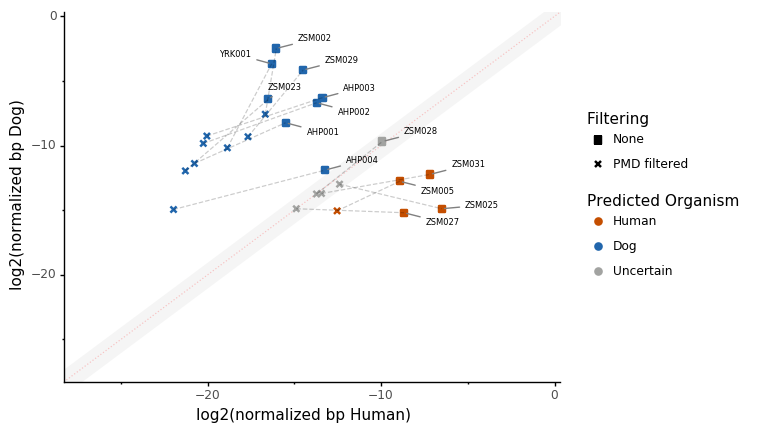

<ggplot: (8794688278525)>

In [26]:
# p = ggplot(data=d3, mapping= aes(x='log_aligned_human', y='log_aligned_dog', label='grepel_name')) + geom_abline(intercept=0, slope=1, color='red', alpha=0.2, linetype='dotted') 
p = ggplot(data=d3, mapping= aes(x='log_aligned_human', y='log_aligned_dog')) 
p = p + geom_polygon(data = uncertain_zone, mapping = aes(x='x',y='y'), fill = '#a2a3a1', alpha=0.1)
p = p + geom_abline(intercept=0, slope=1, color='red', alpha=0.2, linetype='dotted') 
p = p + geom_point(aes(color='prediction', shape='al_type'), stroke=1)
p = p + geom_line(aes(group='sample'), alpha=0.2, linetype='dashed')
p = p + theme_classic()
p = p + geom_text(data = d3, mapping= aes(x='log_aligned_human', y='log_aligned_dog', label = 'grepel_name'), size=6, adjust_text= {
    'expand_points': (2, 2),
    'expand_objects': (1.5, 2),
    'arrowprops': {
        'arrowstyle': '-',
        'color': 'grey'
    },
    'on_basemap':True
})

# p = p + geom_text(size=6, nudge_y=0.16, ha='right')
p = p + scale_shape_manual(name='Filtering', values={'None':'s', 'PMD filtered':'x'})
p = p + scale_color_manual(name='Predicted Organism', values = {'Human':'#c44e00', 'Dog':'#2166ac', 'Uncertain':'#a2a3a1'})
p = p + labs(x='log2(normalized bp Human)', y = 'log2(normalized bp Dog)')
p = p + coord_cartesian(xlim=[-27,-1],ylim=[-27,-1])
p.save("./results/figure4A.png", dpi=300)
p

/projects1/users/borry/15_miniconda3/lib/python3.7/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/projects1/users/borry/15_miniconda3/lib/python3.7/site-packages/plotnine/ggplot.py:720: PlotnineWarning: Filename: ./results/figure4A_supplementary.png
  warn('Filename: {}'.format(filename), PlotnineWarning)
/projects1/users/borry/15_miniconda3/lib/python3.7/site-packages/plotnine/ggplot.py:735: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
  fig.savefig(filename, **fig_kwargs)


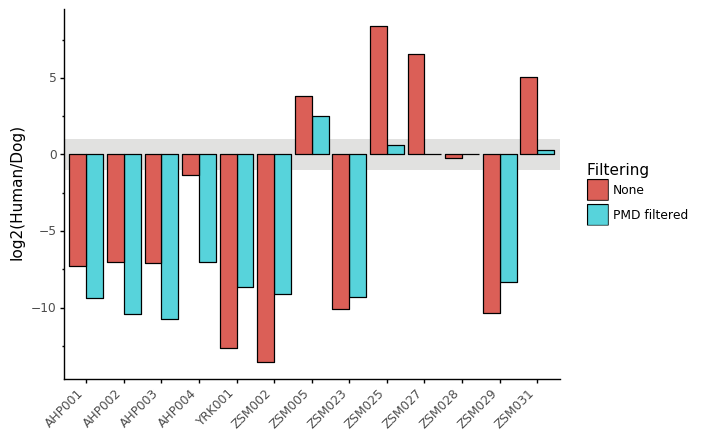

<ggplot: (8794688302158)>

In [27]:
p = ggplot(d3, aes(x='sample', y='log_ratio'))
p = p + geom_rect(ymin=-1,ymax=1, fill='#a2a3a1', xmin=0,xmax=30, alpha=0.01)
p = p + geom_bar(aes(fill='al_type'), stat='identity', position = 'dodge', color = 'black')
p = p + theme_classic() + theme(axis_text_x=element_text(angle=45, hjust=1)) + scale_fill_discrete(name='Filtering')
p = p + labs(x='',y='log2(Human/Dog)')
p.save("./results/figure4A_supplementary.png", dpi=300)
p

## Fig 4b: t-SNE embedding with archaelogical samples

In [28]:
s = "../../data/sourcepredict/sourcepredict_embedding.csv"
s_pred = "../../data/sourcepredict/prediction.sourcepredict.csv"§

In [29]:
sp = pd.read_csv(s, index_col=0)

In [30]:
spp = pd.read_csv(s_pred, index_col=0).T

In [31]:
conditions = [(spp['Canis_familiaris'] > 0.5) ,
              (spp['Homo_sapiens'] > 0.5),
              (spp['Soil'] > 0.5),
              (spp['unknown'] > 0.5)
             ]
choices = ['Canis familiaris', 'Homo sapiens', 'Soil', 'Unknown']
spp['Predicted organism'] = np.select(conditions, choices, default='Unknown')

In [32]:
sp['organism'] = sp.drop(spp.index, axis=0)['labels'].append(spp['Predicted organism'])

In [33]:
sp['ml'] = np.where(sp['labels'] == 'sink', 'predicted', 'reference')

In [34]:
sp['organism'].value_counts()

Homo_sapiens        262
Canis_familiaris    150
Soil                 26
Homo sapiens          8
Unknown               5
Canis familiaris      2
Name: organism, dtype: int64

In [35]:
sp['organism'] = sp['organism'].str.replace('_'," ")

In [36]:
sp

,PC1,PC2,labels,name,organism,ml
SRR1175007,-1.276472,29.826221,Homo_sapiens,SRR1175007,Homo sapiens,reference
SRR042182,0.983194,23.245968,Homo_sapiens,SRR042182,Homo sapiens,reference
SRR061154,0.985785,31.666676,Homo_sapiens,SRR061154,Homo sapiens,reference
SRR061499,-0.614356,26.523350,Homo_sapiens,SRR061499,Homo sapiens,reference
SRR063469,2.448314,24.149035,Homo_sapiens,SRR063469,Homo sapiens,reference
SRR062324,-0.061622,26.583313,Homo_sapiens,SRR062324,Homo sapiens,reference
SRR1179037,-0.788588,29.816334,Homo_sapiens,SRR1179037,Homo sapiens,reference
SRR061236,0.061662,30.686150,Homo_sapiens,SRR061236,Homo sapiens,reference
SRR061456,0.375768,29.539251,Homo_sapiens,SRR061456,Homo sapiens,reference
SRR642021,-4.157003,28.502766,Homo_sapiens,SRR642021,Homo sapiens,reference


In [37]:
sp_pred = sp.query('ml == "predicted"')

In [38]:
sp_ref = sp.query('ml == "reference"')
sp_pred = sp.query('ml == "predicted"')

In [39]:
sample_type = pd.DataFrame({
    'AHP003':['Coprolite', '11' ],
    'CMN001':['Archaelogical sediment','20'],
    'ZSM005':['Coprolite','02'],
    'ZSM002':['Coprolite','01'],
    'ZSM029':['Coprolite','07'],
    'YRK001':['Coprolite','13'],
    'ZSM025':['Coprolite','04'],
    'TRO001':['Archaelogical sediment','14'],
    'ZSM028':['Coprolite','06'],
    'ZSM031':['Coprolite','08'],
    'ZSM023':['Coprolite','03'],
    'ECO004':['Archaelogical sediment','19'],
    'AHP001':['Coprolite','09'],
    'AHP002':['Coprolite','10'],
    'CBA001':['Archaelogical sediment','16'],
    'LEI010':['Archaelogical sediment','18'],
    'AHP004':['Coprolite','12'],
    'DRL001':['Archaelogical sediment','15'],
    'ZSM027':['Coprolite','05'],
    'BRF001':['Archaelogical sediment','17'],
    'MLP001':['Archaelogical sediment','21'],
}, index = ['sample_type','plot_id'])

In [40]:
sp_pred = sp_pred.merge(sample_type.T, left_index=True, right_index=True)

In [41]:
sp_pred['plot_id'].sort_values()

ZSM002    01
ZSM005    02
ZSM023    03
ZSM025    04
ZSM027    05
ZSM028    06
ZSM029    07
ZSM031    08
AHP001    09
AHP002    10
AHP003    11
AHP004    12
YRK001    13
TRO001    14
DRL001    15
CBA001    16
BRF001    17
LEI010    18
ECO004    19
CMN001    20
MLP001    21
Name: plot_id, dtype: object

In [42]:
sp_pred['organism'].value_counts()

Homo sapiens        8
Soil                6
Unknown             5
Canis familiaris    2
Name: organism, dtype: int64

In [43]:
sp_pred.query("organism == 'Canis familiaris'")

,PC1,PC2,labels,name,organism,ml,sample_type,plot_id
AHP004,7.463623,-7.275122,sink,AHP004,Canis familiaris,predicted,Coprolite,12
YRK001,12.980815,1.274512,sink,YRK001,Canis familiaris,predicted,Coprolite,13


In [44]:
sp_pred.query("organism == 'Soil' and sample_type == 'Archaelogical sediment'")

,PC1,PC2,labels,name,organism,ml,sample_type,plot_id
BRF001,-12.659374,-35.260160,sink,BRF001,Soil,predicted,Archaelogical sediment,17
LEI010,-6.298735,-30.463503,sink,LEI010,Soil,predicted,Archaelogical sediment,18
TRO001,-9.569360,-31.206976,sink,TRO001,Soil,predicted,Archaelogical sediment,14
CBA001,-8.971134,-35.102470,sink,CBA001,Soil,predicted,Archaelogical sediment,16


In [45]:
sp_pred.query("sample_type == 'Archaelogical sediment'")

,PC1,PC2,labels,name,organism,ml,sample_type,plot_id
BRF001,-12.659374,-35.260160,sink,BRF001,Soil,predicted,Archaelogical sediment,17
DRL001,-6.732208,-35.138317,sink,DRL001,Unknown,predicted,Archaelogical sediment,15
LEI010,-6.298735,-30.463503,sink,LEI010,Soil,predicted,Archaelogical sediment,18
ECO004,-9.556790,-34.750652,sink,ECO004,Unknown,predicted,Archaelogical sediment,19
MLP001,-6.291108,-30.472930,sink,MLP001,Unknown,predicted,Archaelogical sediment,21
TRO001,-9.569360,-31.206976,sink,TRO001,Soil,predicted,Archaelogical sediment,14
CMN001,-8.172891,-35.017400,sink,CMN001,Unknown,predicted,Archaelogical sediment,20
CBA001,-8.971134,-35.102470,sink,CBA001,Soil,predicted,Archaelogical sediment,16


In [58]:
sp_pred.sort_values("plot_id").merge(spp, left_index=True, right_index=True)[['PC1','PC2','Canis_familiaris','Homo_sapiens','Soil','unknown','Predicted organism','plot_id']].to_csv('sourcepredict_results.csv')

/projects1/users/borry/15_miniconda3/lib/python3.7/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/projects1/users/borry/15_miniconda3/lib/python3.7/site-packages/plotnine/ggplot.py:720: PlotnineWarning: Filename: results/figure4B.png
  warn('Filename: {}'.format(filename), PlotnineWarning)
/projects1/users/borry/15_miniconda3/lib/python3.7/site-packages/plotnine/ggplot.py:735: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
  fig.savefig(filename, **fig_kwargs)


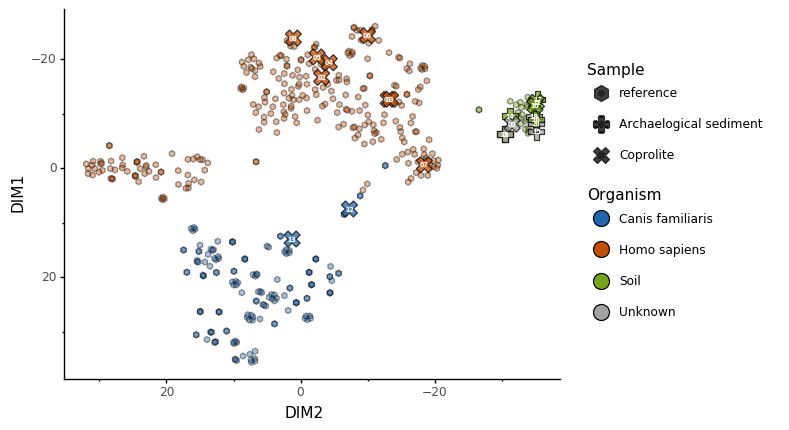

<ggplot: (8794578296461)>

In [47]:
p = ggplot(sp_ref, aes(x='PC1',y='PC2')) + geom_point(aes(fill='organism', shape='ml'), stroke=0.5, color='black', size = 2, alpha=0.4)
p = p + geom_point(data = sp_pred, mapping=aes(x='PC1',y='PC2', fill='organism', shape='sample_type'), stroke=0.5, color='black', size = 6, alpha=0.75)
p = p + geom_text(data = sp_pred, mapping=aes(x='PC1',y='PC2', label='plot_id'), size = 4.5,fontweight = 'bold', color='white')
p = p + scale_shape_manual(name='Sample', values={'Coprolite':'X', 'Archaelogical sediment':'P', 'reference':'h'}) + theme_classic() + labs(x='DIM1',y='DIM2')
p = p + scale_fill_manual(name = 'Organism', values = {"Canis familiaris":"#2166ac","Homo sapiens":"#c44e00", "Soil":"#75a51c", 'Unknown':'#a2a3a1'})
p = p + guides(fill = guide_legend(override_aes = {'alpha':1}))
p = p + coord_flip() + scale_y_reverse() + scale_x_reverse()
p.save("results/figure4B.png", dpi=300)
p